# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
img_path = 'data/lena.png'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

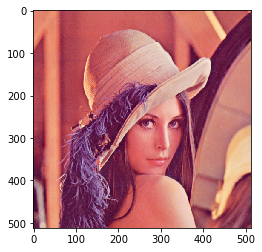

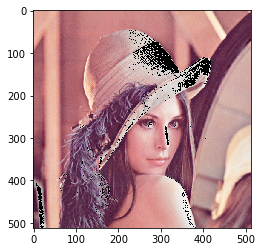

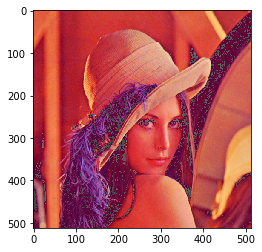

In [2]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.2


# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
img_hsv_down = img_hsv.astype('float32')
img_hsv_down[:, :, 1] = img_hsv_down[:, :, 1]/255 - change_percentage
img_hsv_down[img_hsv_down[:, :, 1] < 0] =0 
img_hsv_down[:, : , 1] = img_hsv_down[:, :, 1] *255
img_hsv_down = img_hsv_down.astype('uint8')
# 在 HSV color space 增加飽和度
img_hsv_up = img_hsv.astype('float32')
img_hsv_up[:, : , 1] = img_hsv_up[:, : , 1]/255 + change_percentage
img_hsv_up[img_hsv_up[:, :, 1] < 0] =0 
img_hsv_up[:, : , 1] = img_hsv_up[:, :, 1] *255
img_hsv_up = img_hsv_up.astype('uint8')
# 轉換 color space 回 BGR
img_hsv_down = cv2.cvtColor(img_hsv_down, cv2.COLOR_HSV2RGB)
img_hsv_up = cv2.cvtColor(img_hsv_up, cv2.COLOR_HSV2RGB)
imgRGB =  cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 組合圖片 + 顯示圖片 with cv2
# img_hsv_change = np.hstack((img, img_hsv_down, img_hsv_up))
# while True:
#     cv2.imshow('change saturation', img_hsv_change)
    
#     k = cv2.waitKey(0)
#     if k == ord('q'):
#         cv2.destroyAllWindows()
#         break
# 組合圖片 + 顯示圖片 with plt
img_hsv_change = [imgRGB, img_hsv_down, img_hsv_up]
for i in img_hsv_change:
    plt.figure()
    plt.imshow(i)

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

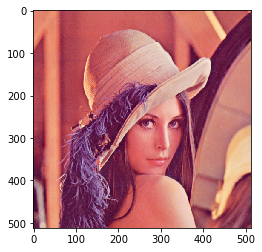

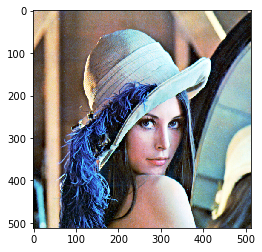

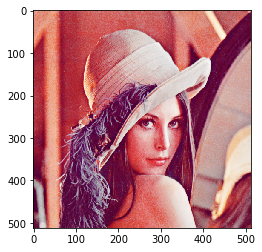

In [3]:
# case 1
# 每個 channel 個別做直方圖均衡
equalHist_by_channel_B = cv2.equalizeHist(img[:, :, 0])
equalHist_by_channel_G = cv2.equalizeHist(img[:, :, 1])
equalHist_by_channel_R = cv2.equalizeHist(img[:, :, 2])
# 組合經過直方圖均衡的每個 channel
img_bgr_equal = cv2.merge((equalHist_by_channel_B, equalHist_by_channel_G, equalHist_by_channel_R))
img_rgb_equal = cv2.cvtColor(img_bgr_equal, cv2.COLOR_BGR2RGB)
# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
img_hsv_equal = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hsv_equal[:, :, 1] = cv2.equalizeHist(img_hsv_equal[:, :, 1] )
img_hsv2RGB_equal = cv2.cvtColor(img_hsv_equal, cv2.COLOR_HSV2RGB)

# # 組合圖片 + 顯示圖片
# img_bgr_equalHist = np.hstack((img, img_bgr_equal, img_hsv_equal))
# while True:
#     # 比較 (原圖, BGR color space 對每個 channel 做直方圖均衡, HSV color space 對明度做直方圖均衡)
#     cv2.imshow('bgr equal histogram', img_bgr_equalHist)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break
img_rgb_equalHist = [imgRGB, img_rgb_equal, img_hsv2RGB_equal]
for i in img_rgb_equalHist:
    plt.figure()
    plt.imshow(i)

## 調整對比 / 明亮

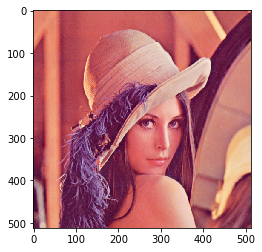

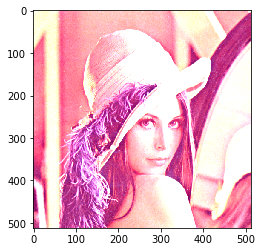

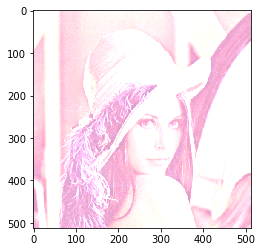

In [4]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha =2)
add_contrast_rgb = cv2.cvtColor(add_contrast, cv2.COLOR_BGR2RGB)
add_lighness = cv2.convertScaleAbs(img, beta =150)
add_lighness_rgb = cv2.cvtColor(add_lighness, cv2.COLOR_BGR2RGB)
# 組合圖片 + 顯示圖片
# img_contrast_light = np.hstack((img, add_contrast, add_lighness))
# while True:
#     # 比較不同程度的對比 / 明亮
#     cv2.imshow('adjust contrast and brighness', img_contrast_light)
#     k = cv2.waitKey(0)
#     if k == ord('q'):
#         cv2.destroyAllWindows()
#         break

img_contrast_light =[imgRGB, add_contrast_rgb, add_lighness_rgb]
for i in img_contrast_light:
    plt.figure()
    plt.imshow(i)